Какую музыку вы слушаете? Жанровая классификация на Python
Небольшое руководство по анализу и жанровой классификации аудио/музыкальных сигналов на Python.

Разнообразные сервисы и платформы потоковой музыки, такие как Spotify и SoundCloud, стремятся постоянно улучшать способы подбора и рекомендации композиций для своих пользователей. Системы жанровой классификации музыки совершенствуются, а в их основе лежит машинное обучение.

В ход идут все известные методы: от NLP и коллаборативной фильтрации до deep learning. Песни распределяются по жанрам на основе их темпа, акустики, энергичности, танцевальности и десятков других характеристик.

В этой статье мы разбираемся, как анализировать и классифицировать музыкальные сигналы с помощью средств, которые предоставляет язык Python.

Если вы начинающий программист, обратите внимание на эти лучшие для изучения Python бесплатные книги, которые мы собрали специально для вас.

Обработка звука на Python
Звук – это сигнал с набором определенных параметров: частота, полоса пропускания пропускная способность, децибелы и прочее. Типичный звуковой сигнал может быть выражен как функция от амплитуды и времени:






Компьютеры могут работать с различными аудиоформатами:

mp3;
wma (Windows Media Audio);
wav (Waveform Audio File).
Python библиотеки для работы со звуком
Для работы со звуком на Python существует ряд мощных библиотек, например, Librosa или PyAudio, а также встроенные модули, поддерживающие базовую функциональность.


Мы будем использовать  для этих целей Librosa.
Librosa может работать с любыми звуковыми сигналами, но ориентирована в основном именно на музыку. Она позволяет создать полноценную систему извлечения музыкальной информации (MIR). Модуль прекрасно документирован, кроме того, существует множество руководств по использованию. Принципы разработки подробно разобраны в этой статье с конференции SciPy2015.



In [1]:
import librosa
audio_path = 'Harley1.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


Этот код превращает временной ряд аудио в NumPy массив с частотой дискретизации (sr) 22 кГц. Дефолтное значение можно изменить, например, на 44.1 кГц:

In [2]:
Xdb = librosa.load(audio_path, sr=44100)

In [3]:
#  совсем отключить семплирование:
librosa.load(audio_path, sr=None)
# Частота дискретизации – это количество семплов (колебаний) звука, 
# передаваемого в секунду, измеренное в Гц или кГц.

(array([ 0.0234375,  0.015625 ,  0.015625 , ..., -0.1171875, -0.1328125,
        -0.1484375], dtype=float32),
 11127)

In [4]:
# Воспроизведем файл
import IPython.display as ipd
ipd.Audio(audio_path)

Text(0.5, 1.0, 'График амплитудной огибающей сигнала')

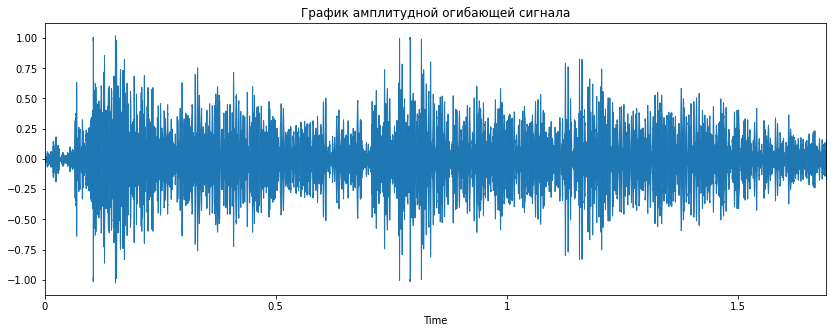

In [5]:
# Используя librosa.display.waveplot, можно визуализировать массив аудиоданных:

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

# plt.title("График амплитудной огибающей сигнала")
plt.figure(figsize=(14, 5), )
librosa.display.waveplot(x, sr=sr)
plt.title("График амплитудной огибающей сигнала")


Вертикальная ось – это частоты (от 0 до 10 кГц), а горизонтальная – время клипа. Поскольку все значимые изменения происходят в нижней части спектра, частотную ось можно преобразовать в логарифмическую.

Создание звукового сигнала
Давайте теперь создадим на Python звуковой сигнал с частотой 220 Гц. Это NumPy массив, который будет передан в функцию Audio:

In [6]:
# Создадим на Python звуковой сигнал с частотой 220 Гц
# Это NumPy массив, который будет передан в функцию Audio:

import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

# Воспроизведение
ipd.Audio(x, rate=sr) # load a NumPy array

# Сохранение
# librosa.output.write_wav('tone_220.wav', x, sr)